In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


/var/folders/mw/jx5ctl4n7216rd2nx40wbgcc0000gp/T/ipykernel_29252/512245572.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print(f"Point {i+1}: Lat={lat:.2f}, Lon={lon:.2f}, Time={datetime.utcfromtimestamp(timestamp)} UTC")


Point 1: Lat=-12.67, Lon=-20.11, Time=2025-07-02 10:44:05 UTC
Point 2: Lat=-13.28, Lon=-19.66, Time=2025-07-02 10:44:17 UTC
Point 3: Lat=-13.93, Lon=-19.16, Time=2025-07-02 10:44:30 UTC
Point 4: Lat=-14.47, Lon=-18.74, Time=2025-07-02 10:44:41 UTC
Point 5: Lat=-15.12, Lon=-18.23, Time=2025-07-02 10:44:54 UTC
Point 6: Lat=-15.77, Lon=-17.73, Time=2025-07-02 10:45:07 UTC
Point 7: Lat=-16.31, Lon=-17.30, Time=2025-07-02 10:45:18 UTC
Point 8: Lat=-16.91, Lon=-16.83, Time=2025-07-02 10:45:30 UTC
Point 9: Lat=-17.50, Lon=-16.35, Time=2025-07-02 10:45:42 UTC
Point 10: Lat=-18.09, Lon=-15.87, Time=2025-07-02 10:45:54 UTC
Point 11: Lat=-18.73, Lon=-15.35, Time=2025-07-02 10:46:07 UTC
Point 12: Lat=-19.27, Lon=-14.90, Time=2025-07-02 10:46:18 UTC
Point 13: Lat=-19.90, Lon=-14.37, Time=2025-07-02 10:46:31 UTC
Point 14: Lat=-20.49, Lon=-13.87, Time=2025-07-02 10:46:43 UTC
Point 15: Lat=-21.07, Lon=-13.38, Time=2025-07-02 10:46:55 UTC
Point 16: Lat=-21.65, Lon=-12.87, Time=2025-07-02 10:47:07 UTC
P

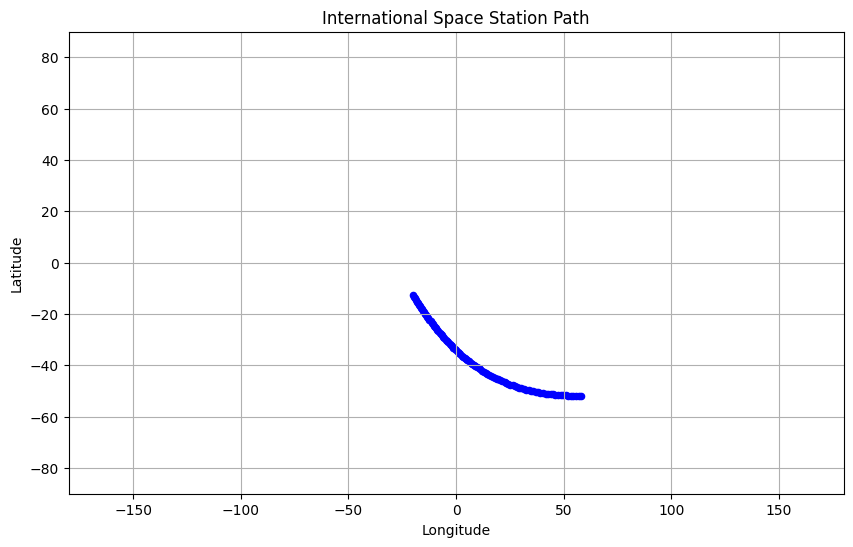

In [2]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime

latitudes = []
longitudes = []
timestamps = []

num_points = 100
interval = 10 

for i in range(num_points):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    data = response.json()
    
    lat = data['latitude']
    lon = data['longitude']
    timestamp = data['timestamp']
    
    latitudes.append(lat)
    longitudes.append(lon)
    timestamps.append(timestamp)
    
    print(f"Point {i+1}: Lat={lat:.2f}, Lon={lon:.2f}, Time={datetime.utcfromtimestamp(timestamp)} UTC")
    
    if i < num_points - 1:
        time.sleep(interval)

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, color='blue', s=20)  # s is marker size in points^2

plt.title("International Space Station Path")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.show()